In [2]:
import pandas as pd
df = pd.read_excel('/content/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Now I see that we have dataframe index and ROW ID as two columns serving the same purpose. Charlotte told me that's it's safer to leave the ROW ID because I might need it later on (if for example later I find out that ROW ID is unique to company)


In [9]:
# Convert 'Order Date' and 'Ship Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')


In [11]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

In [15]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# If there are any duplicates, consider removing them
if duplicates > 0:
    df = df.drop_duplicates()

# Check unique values in 'Ship Mode' to ensure consistency
print("Unique values in 'Ship Mode':", df['Ship Mode'].unique())


Number of duplicate rows: 0
Unique values in 'Ship Mode': ['Second Class' 'Standard Class' 'First Class' 'Same Day']


2. Data Visualization with Plotly:

Create an interactive line chart to show sales trends over the years.
Build an interactive map to visualize sales distribution by country.

In [16]:
import plotly.express as px

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# Extract the year from 'Order Date'
df['Order Year'] = df['Order Date'].dt.year

# Group by 'Order Year' and calculate total sales for each year
sales_trend = df.groupby('Order Year')['Sales'].sum().reset_index()

# Create an interactive line chart using Plotly
fig = px.line(sales_trend, x='Order Year', y='Sales', title='Sales Trends Over the Years',
              labels={'Order Year': 'Year', 'Sales': 'Total Sales'})

fig.show()


<ipython-input-16-12de842ca678>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
<ipython-input-16-12de842ca678>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Year'] = df['Order Date'].dt.year


Step 2: Build an Interactive Map for Sales Distribution by Country

In [17]:
# Group by 'Country' and calculate total sales for each country
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

# Create an interactive map using Plotly
fig_map = px.choropleth(sales_by_country,
                        locations='Country',
                        locationmode='country names',
                        color='Sales',
                        hover_name='Country',
                        title='Sales Distribution by Country')

fig_map.show()


3. Data Visualization with Plotnine:

Use Plotnine to generate a bar chart showing top 10 products by sales.

Create a scatter plot to analyze the relationship between profit and discount.

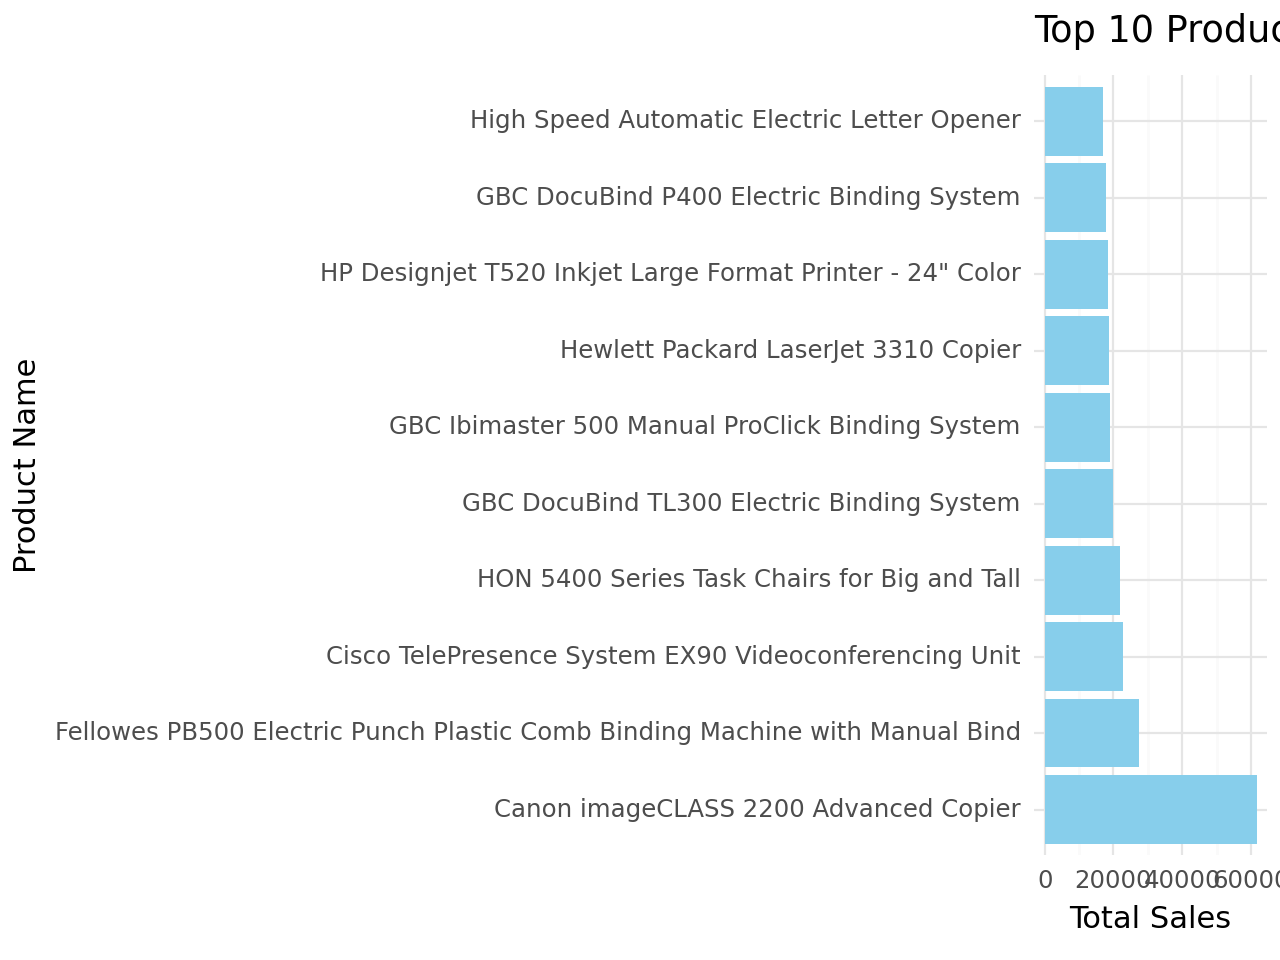

In [24]:
from plotnine import ggplot, aes, geom_bar, coord_flip, theme_minimal, labs

# Group by 'Product Name' and calculate total sales for each product
top_products = df.groupby('Product Name')['Sales'].sum().reset_index()

# Sort products by sales and take the top 10
top_10_products = top_products.nlargest(10, 'Sales')

# Reorder the 'Product Name' based on 'Sales' for proper plotting
top_10_products = top_10_products.sort_values('Sales', ascending=False)
top_10_products['Product Name'] = pd.Categorical(top_10_products['Product Name'],
                                                 categories=top_10_products['Product Name'],
                                                 ordered=True)

# Create the bar chart using plotnine
plot = (ggplot(top_10_products, aes(x='Product Name', y='Sales')) +
        geom_bar(stat='identity', fill='skyblue') +
        coord_flip() +  # Flip axes for better readability
        labs(title='Top 10 Products by Sales', x='Product Name', y='Total Sales') +
        theme_minimal())

# Display the plot
print(plot)


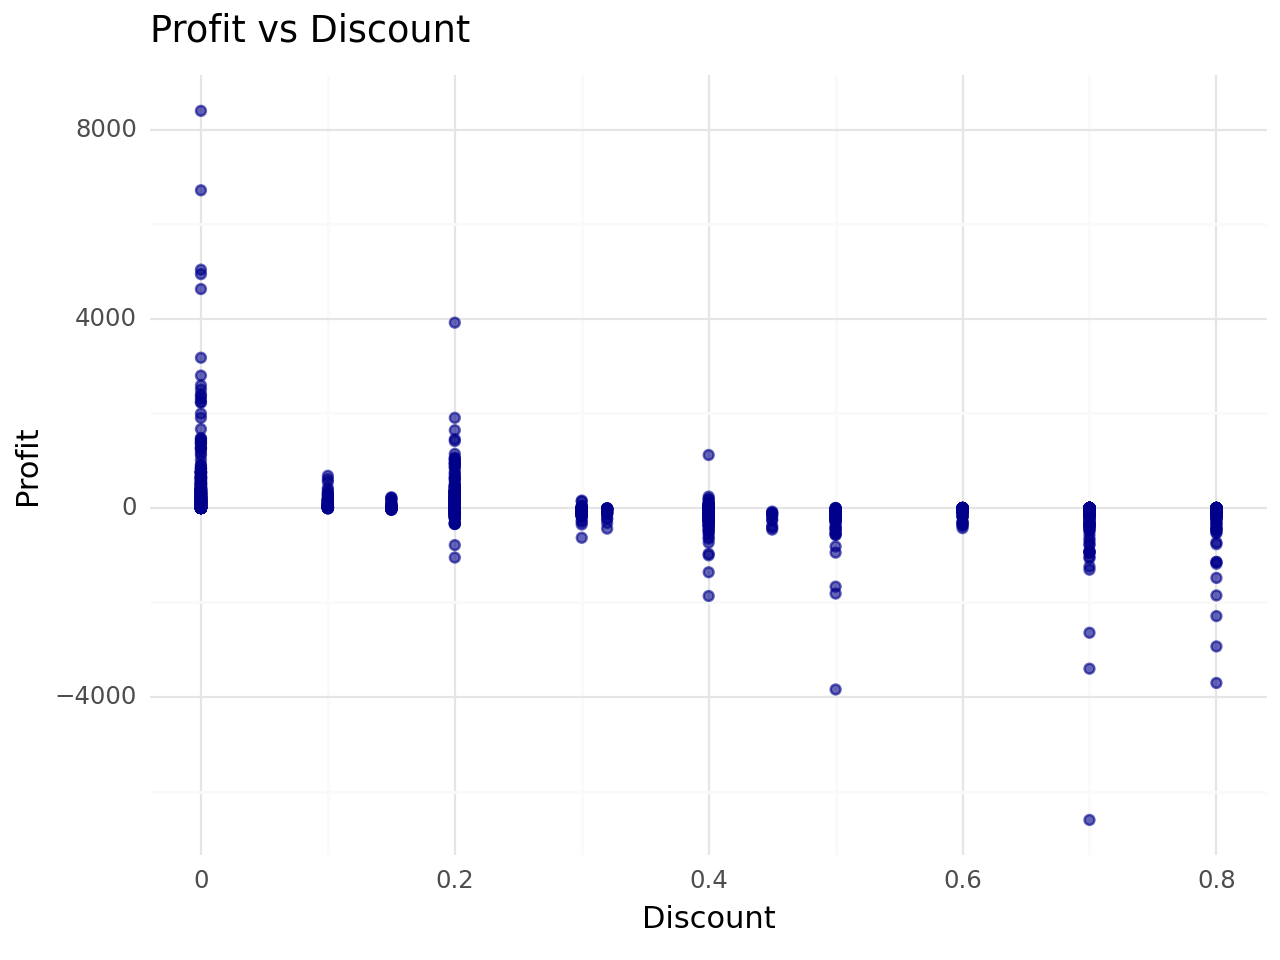

In [25]:
from plotnine import geom_point

# Create a scatter plot to show the relationship between profit and discount
scatter_plot = (ggplot(df, aes(x='Discount', y='Profit')) +
                geom_point(color='darkblue', alpha=0.6) +
                labs(title='Profit vs Discount', x='Discount', y='Profit') +
                theme_minimal())

print(scatter_plot)
# The data is like this because we have only few values for discount.

not so much helpfull, too few disount points + I guess we need to look isolated per product (and also standardize quantities, per unit sold for example)

4. Comparative Analysis:

Compare the insights gained from Plotly and Plotnine visualizations.

Document your observations about the ease of use and effectiveness of both tools.

Plotly is interactive, 3d and easier to write.
Plotnine is layer based, harder syntax (simillar to R and not python) - based on grammar of graphics which is unkown to me